# Load packages and libraries

In [2]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
#suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(SeuratData))
#suppressMessages(library(SeuratDisk))
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))




[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

# Read objects clustered after genotyping

In [3]:
setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")

In [4]:
adata<-readRDS(file="merged_Post_G_rpca_reclustered.rds")


In [5]:
adata


An object of class Seurat 
103847 features across 30756 samples within 4 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 3 other assays present: RNA, RNA_raw, SCT
 2 dimensional reductions calculated: PCA_POST_G, UMAP_POST_G

genes<-readRDS(file="merged_post_rpca_reclustered_MARKER_GENES.rds")

cat("genes_0/n")
cat(str(genes))
cat("/n")

## Check metadata

In [33]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"               
[24] "integrated_nn_res.0.5"               
[25] "Subclusters_2"                       
[26] "Subclusters_5"                       
[27] "Subclusters_7"                       
[28] "Subclusters_9"                       
[29] "Subclusters_10"                      
[30] "Subclusters_11"                      
[31] "Subclusters_13"                      
[32] "my_own_clusters"                     
[33] "Integrated_annotation_after_rpca"    
[34] "Assignation_demux_NO_CellBender"     
[35] "Assigned_GFPbc_demux__NO_CellBender" 
[36] "Assignation_demux_CellBender"        
[37] "Assigned_GFPbc_demux_CellBender"     
[38] "Assignation_GEX_not_amplified"       
[39] "time_point"                          
[40] "integrative_genotyping"              
[41] "clone_line"                          
[42] "Genotype"                            
[43] "SCT_SNN_res.0.5"

In [34]:
str(adata@meta.data$Integrated_annotation_after_rpca)

str(adata@meta.data$Genotype)

str(adata@meta.data$clone_line)

 chr [1:30756] "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" ...
 chr [1:30756] "rs62237617_DNMT3A" "wt" "DNMT3A" "DNMT3A" ...
 chr [1:30756] "rs62237617_DNMT3A_1" "wt_2" "DNMT3A_1" "DNMT3A_1" ...


In [35]:
## Order factors from metadata

In [36]:
adata@meta.data$Integrated_annotation_after_rpca<-droplevels(factor(adata@meta.data$Integrated_annotation_after_rpca,
                                       levels = c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"),
                                       ordered=T))

summary(adata@meta.data$Integrated_annotation_after_rpca)

hESC HemogenicEndothelium                  MEP 
               16353                 1614                 9859 
     early erythroid       late erythroid           unassigned 
                1038                  122                 1770

In [37]:
adata@meta.data$Diff<-factor(adata@meta.data$Diff,
                                       levels = c("Diff_MK_non_competition"),
                                       ordered=T)

summary(adata@meta.data$Diff)

Diff_MK_non_competition 
                  30756

In [38]:
adata@meta.data$time_point<-droplevels(factor(adata@meta.data$time_point,
                                       levels = c("0_days","8_days","12_days",
                                                  "14_days","15_days","28_days",
                                                  "35_days"),
                                       ordered=T))

summary(adata@meta.data$time_point)

0_days 8_days 
 14868  15888

In [39]:
adata@meta.data$clone_line<-factor(adata@meta.data$clone_line,
                                  levels=c('wt_1','wt_2','wt_3','rs62237617_1','rs62237617_2','rs62237617_3',
                                           'DNMT3A_1','DNMT3A_2','DNMT3A_3',
                                          'rs62237617_DNMT3A_1','rs62237617_DNMT3A_2','rs62237617_DNMT3A_3'),
                                  ordered=T)
summary(adata@meta.data$clone_line)

wt_1                wt_2                wt_3        rs62237617_1 
               1314                3724                1889                3043 
       rs62237617_2        rs62237617_3            DNMT3A_1            DNMT3A_2 
                357                4602                4902                 286 
           DNMT3A_3 rs62237617_DNMT3A_1 rs62237617_DNMT3A_2 rs62237617_DNMT3A_3 
               2642                3434                 390                4173

In [40]:
 adata@meta.data$Genotype<-factor(adata@meta.data$Genotype,
                                  levels=c('wt','rs62237617','DNMT3A','rs62237617_DNMT3A'),
                                  ordered=T)

summary(as.factor(adata@meta.data$Genotype))
  cat("\n")

wt        rs62237617            DNMT3A rs62237617_DNMT3A 
             6927              8002              7830              7997

# Initial Graphs

In [41]:
path_RPCA_POST_G<-"/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/RPCA_POST_G/"

In [42]:
if (file.exists(path_RPCA_POST_G)){

    }else{

    dir.create(path_RPCA_POST_G)
    }

NULL

In [43]:
path_graphs<-paste(path_RPCA_POST_G,"graphs/", sep="")

In [44]:
if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

NULL

## Wnn graphs 

## seurat_clusters

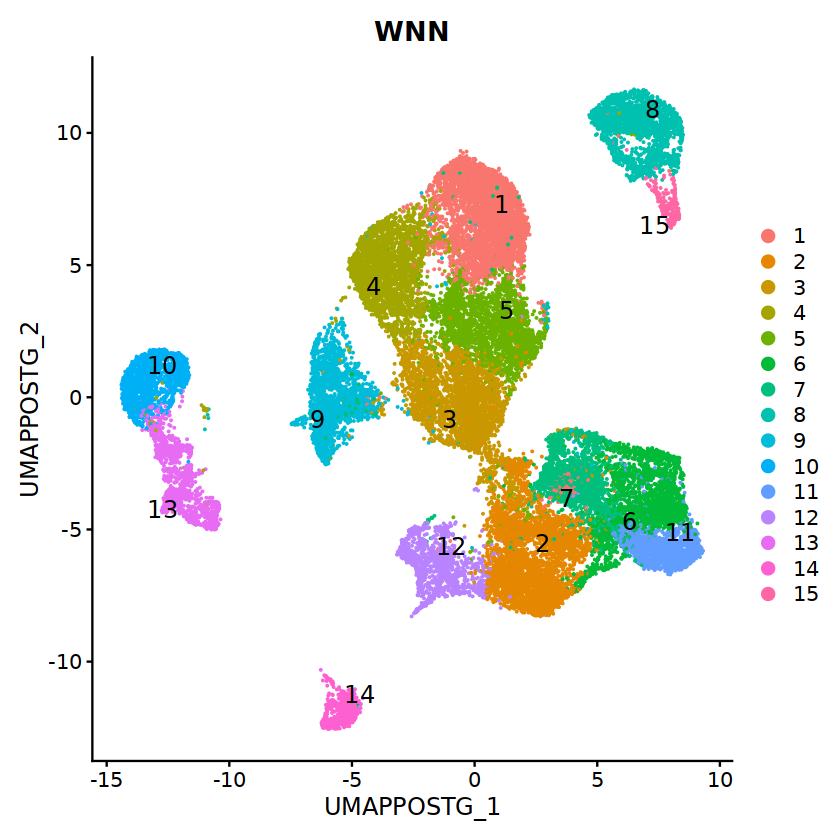

In [45]:
p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("WNN")
p3


In [46]:
setwd(path_graphs)
png(file='UMAP_POST_G_recluster_at_0.5.png')
p3
dev.off()

png 
  2

## Cell type distribution in cluster

### Integrated_annotation_after_rpca seurat_clusters time_point vs Diff

In [47]:
met<-adata[[]]

In [48]:
met.dt<-data.table(met,key=c("time_point","Integrated_annotation_after_rpca","seurat_clusters","Diff"))

In [49]:
#str(met.dt)

In [50]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	47 obs. of  5 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 3 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                            : int  3722 1 2783 2614 2359 3 1420 1949 7 7 ...


In [51]:
met.dt<-data.table(met, key=c("time_point","seurat_clusters","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	24 obs. of  4 variables:
 $ time_point     : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ seurat_clusters: Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff           : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTAL          : int  3729 1 2783 2615 2359 4 1420 1950 7 162 ...


In [52]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","seurat_clusters","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [53]:
str(Freq.table)

'data.frame':	47 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...


In [54]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	2 obs. of  3 variables:
 $ time_point: Ord.factor w/ 2 levels "0_days"<"8_days": 1 2
 $ Diff      : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1
 $ ntime     : int  14868 15888


In [55]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	47 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [56]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	39 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 3 4 4 5 8 9 9 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 3 1 1 3 1 1 ...
 $ Freq                            : int  3722 7 2783 2614 1 2359 1420 1 1949 88 ...
 $ TOTAL                           : int  3729 3729 2783 2615 2615 2359 1420 1950 1950 162 ...
 $ Perc                            : num  99.81 0.19 100 99.96 0.04 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 15888 ...


In [57]:
fill_colours<-c(brewer.pal(7, "Spectral"),brewer.pal(9, "Purples")[c(5,6)],brewer.pal(9, "Blues")[c(1:9)],brewer.pal(9, "BrBG")[c(3:4)],"gray")
    
length(fill_colours)

length(c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"))


[1] 21

[1] 21

In [58]:
str(Freq.table_filtered)

'data.frame':	39 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 3 4 4 5 8 9 9 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 3 1 1 3 1 1 ...
 $ Freq                            : int  3722 7 2783 2614 1 2359 1420 1 1949 88 ...
 $ TOTAL                           : int  3729 3729 2783 2615 2615 2359 1420 1950 1950 162 ...
 $ Perc                            : num  99.81 0.19 100 99.96 0.04 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 15888 ...


-------------------------------------->	0 25 50 75 100


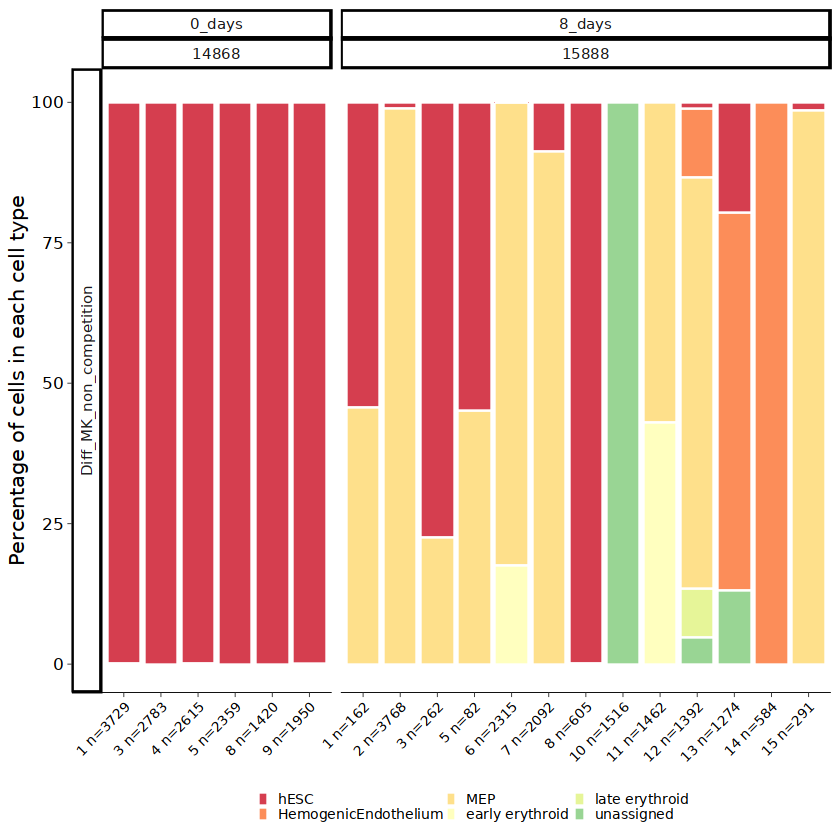

In [59]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(seurat_clusters, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=Integrated_annotation_after_rpca)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [60]:
setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_seurat_clusters_vs_Integrated_annotation_after_rpca",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

Saving 6.67 x 6.67 in image


## Dotplot on markers

In [61]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [62]:
# based on https://github.com/satijalab/seurat/issues/4688

In [63]:
summary(adata@meta.data$Diff)

Diff_MK_non_competition 
                  30756

Warning message:
"Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: TRDC"
Warning message:
"The following requested variables were not found: TRDC"


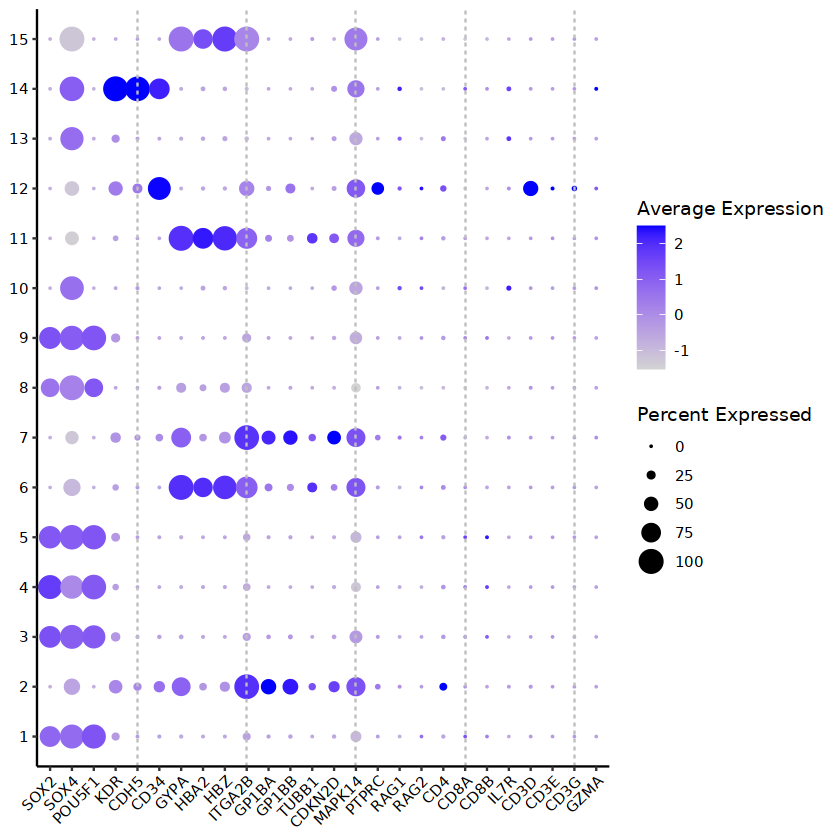

In [64]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [65]:
setwd(path_graphs)
png(file='POST_G_Dotplot_seurat_clusters.png')
dotplot3
dev.off()

png 
  2

# Find clusters at higher resolution

cat("FindClusters\n")
  
  
adata <- FindClusters(adata, graph.name='integrated_nn_POST_G', 
                      algorithm=4, resolution = 2, verbose=FALSE, method = "igraph")
  

# Graphs post reclustering

path_graphs<-"/group/soranzo/manuel.tardaguila/2025_hESC_lymph_multiome/targeted_amplicon_GEX/cellranger/processing_outputs/graphs/"

if (file.exists(path_graphs)){

    }else{

    dir.create(path_graphs)
    }

## Wnn graphs 

## seurat_clusters

p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE) + ggtitle("WNN")
p3


setwd(path_graphs)
png(file='UMAP_POST_G_recluster_at_2.png')
p3
dev.off()

## Cell type distribution in cluster

### Integrated_annotation_after_rpca seurat_clusters time_point vs Diff

met<-adata[[]]

met.dt<-data.table(met,key=c("time_point","Integrated_annotation_after_rpca","seurat_clusters","Diff"))

#str(met.dt)

Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

met.dt<-data.table(met, key=c("time_point","seurat_clusters","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","seurat_clusters","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

str(Freq.table)

met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

fill_colours<-c(brewer.pal(7, "Spectral"),brewer.pal(9, "Purples")[c(5,6)],brewer.pal(9, "Blues")[c(1:9)],brewer.pal(9, "BrBG")[c(3:4)],"gray")
    
length(fill_colours)

length(c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"))


str(Freq.table_filtered)

#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(seurat_clusters, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=Integrated_annotation_after_rpca)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_seurat_clusters_vs_Integrated_annotation_after_rpca_RES_2",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

## Dotplot on markers

markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

# based on https://github.com/satijalab/seurat/issues/4688

summary(adata@meta.data$Diff)

dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



setwd(path_graphs)
png(file='POST_G_Dotplot_Diff_MK_seurat_clusters_RES_2.png')
dotplot3
dev.off()

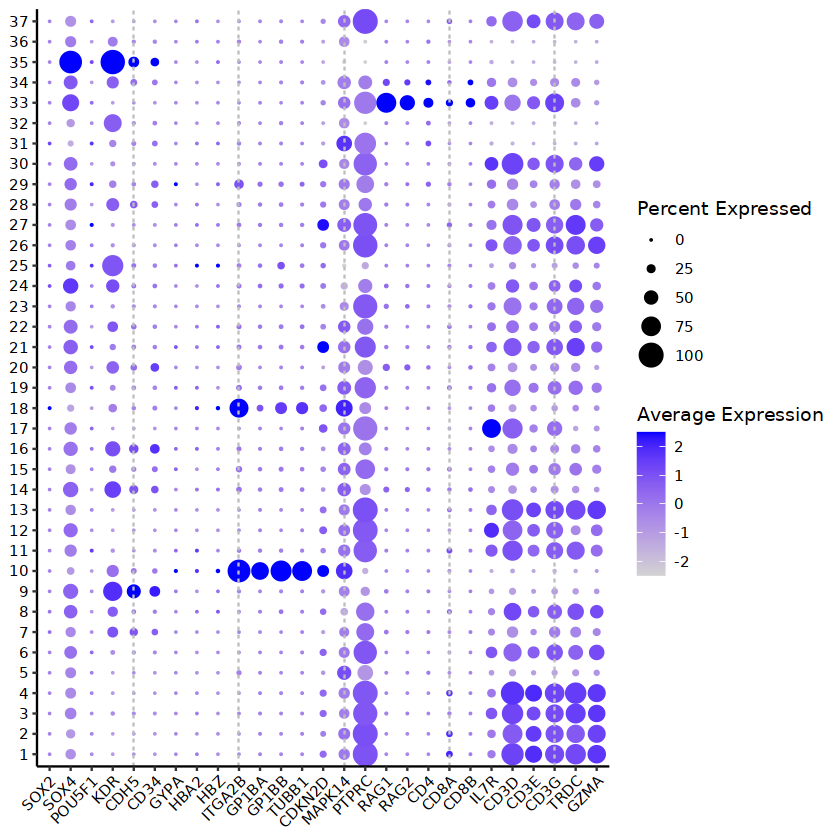

In [121]:
dotplot3<-DotPlot(
  adata_Diff_lymph,
  features=markers,
  assay = "SCT",
    group.by="seurat_clusters")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [122]:
setwd(path_graphs)
png(file='POST_G_Dotplot_Diff_lymph_seurat_clusters_RES_2.png')
dotplot3
dev.off()

png 
  2

In [123]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "nCount_SCT"                          
[54] "nFeature_SCT"                        
[55] "SCT.weight"                          
[56] "ATAC.weight"                         
[57] "wsnn_res.0.2"                        
[58] "seurat_clusters"                     
[59] "Diff"                                
[60] "doublet"                             
[61] "wsnn_res.2"                          
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "integrated_nn_res.0.5"               
[70] "Assignation_demux_NO_CellBender"     
[71] "Assigned_GFPbc_demux__NO_CellBender" 
[72] "Assignation_demux_CellBender"        
[73] "Assigned_GFPbc_demux_CellBender"     
[74] "Assignation_GEX_not_amplified"       
[75] "time_point"                          
[76] "integrative_genotyping"              
[77] "clone_line"                          
[78] "Genotype"                            
[79] "integrated_nn_POST_G_res.0.5"        
[80] "integrated_nn_POST_G_res.1"          
[81] "integrated_nn_POST_G_res.2"

In [124]:
str(adata@meta.data$integrated_nn_POST_G_res.0.5)

 Factor w/ 16 levels "1","2","3","4",..: 3 3 3 3 2 2 3 8 10 5 ...


# Choose integrated_nn_POST_G_res.0.5 as seurat_clusters

cat("FindClusters_DEF\n")
  
  
adata <- FindClusters(adata, graph.name='integrated_nn_POST_G', 
                      algorithm=4, resolution = 0.5, verbose=FALSE, method = "igraph")
  

## Cell type distribution in cluster

### Integrated_annotation_after_rpca seurat_clusters time_point vs Diff

In [85]:
met<-adata[[]]

In [86]:
met.dt<-data.table(met,key=c("time_point","Integrated_annotation_after_rpca","seurat_clusters","Diff"))

In [87]:
#str(met.dt)

In [88]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	47 obs. of  5 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 3 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                            : int  3722 1 2783 2614 2359 3 1420 1949 7 7 ...


In [89]:
met.dt<-data.table(met, key=c("time_point","seurat_clusters","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	24 obs. of  4 variables:
 $ time_point     : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 2 ...
 $ seurat_clusters: Factor w/ 15 levels "1","2","3","4",..: 1 2 3 4 5 7 8 9 13 1 ...
 $ Diff           : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ TOTAL          : int  3729 1 2783 2615 2359 4 1420 1950 7 162 ...


In [90]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","seurat_clusters","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [91]:
str(Freq.table)

'data.frame':	47 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...


In [92]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	2 obs. of  3 variables:
 $ time_point: Ord.factor w/ 2 levels "0_days"<"8_days": 1 2
 $ Diff      : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1
 $ ntime     : int  14868 15888


In [93]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	47 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 2 3 4 4 5 7 7 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 1 3 1 3 1 ...
 $ Freq                            : int  3722 7 7 1 2783 2614 1 2359 1 3 ...
 $ TOTAL                           : int  3729 3729 7 1 2783 2615 2615 2359 4 4 ...
 $ Perc                            : num  99.81 0.19 100 100 100 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [94]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 5),]

str(Freq.table_filtered)

'data.frame':	44 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 3 4 4 5 8 9 9 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 3 1 1 3 1 ...
 $ Freq                            : int  3722 7 7 2783 2614 1 2359 1420 1 1949 ...
 $ TOTAL                           : int  3729 3729 7 2783 2615 2615 2359 1420 1950 1950 ...
 $ Perc                            : num  99.81 0.19 100 100 99.96 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [95]:
fill_colours<-c(brewer.pal(7, "Spectral"),brewer.pal(9, "Purples")[c(5,6)],brewer.pal(9, "Blues")[c(1:9)],brewer.pal(9, "BrBG")[c(3:4)],"gray")
    
length(fill_colours)

length(c("hESC","HemogenicEndothelium","MEP","early erythroid","late erythroid",
                                                 "early MK","MK","Mast cells","Classical monocytes",
                                                 "Double-negative thymocytes","gamma-delta T cells","ILC3","Regulatory T cells",
                                                 "Tem/Effector helper T cells","Type 17 helper T cells","Plasmablasts","NK cells","CD16- NK cells",
                                                 "Epithelial cells","Fibroblasts","unassigned"))


[1] 21

[1] 21

In [96]:
str(Freq.table_filtered)

'data.frame':	44 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters                 : Factor w/ 15 levels "1","2","3","4",..: 1 1 13 3 4 4 5 8 9 9 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 1 1 3 1 1 3 1 ...
 $ Freq                            : int  3722 7 7 2783 2614 1 2359 1420 1 1949 ...
 $ TOTAL                           : int  3729 3729 7 2783 2615 2615 2359 1420 1950 1950 ...
 $ Perc                            : num  99.81 0.19 100 100 99.96 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


-------------------------------------->	0 25 50 75 100


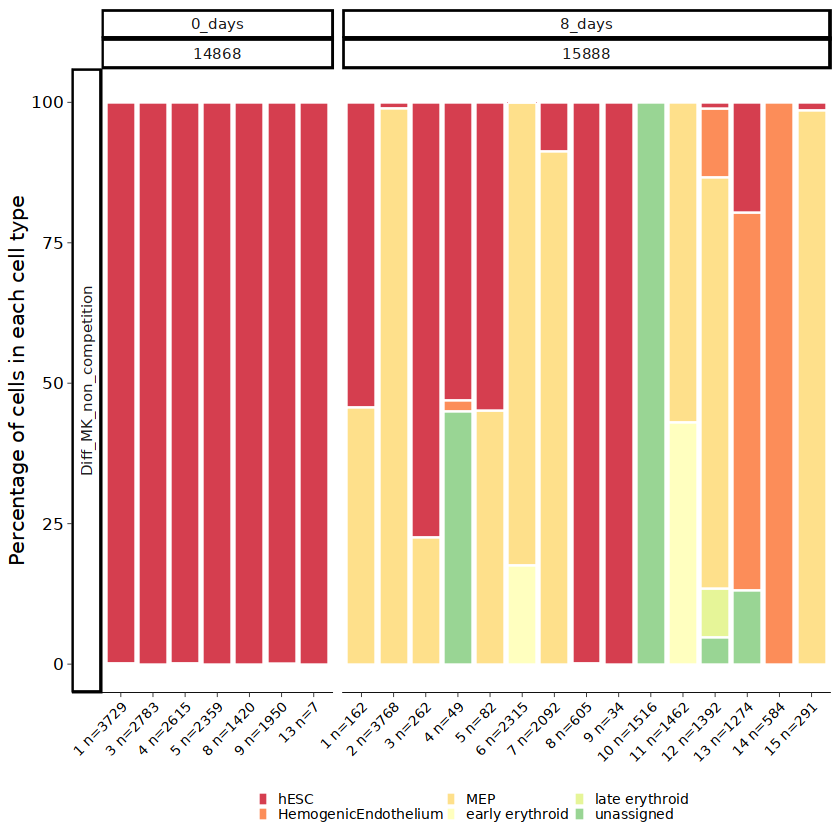

In [97]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(seurat_clusters, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(seurat_clusters)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=Integrated_annotation_after_rpca)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [98]:
setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_seurat_clusters_vs_Integrated_annotation_after_rpca",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

Saving 6.67 x 6.67 in image


# FINAL GRAPHS

In [100]:
adata

An object of class Seurat 
103847 features across 30756 samples within 4 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 3 other assays present: RNA, RNA_raw, SCT
 2 dimensional reductions calculated: PCA_POST_G, UMAP_POST_G

## New vector colors

In [101]:
levels(adata@meta.data$Integrated_annotation_after_rpca)

[1] "hESC"                 "HemogenicEndothelium" "MEP"                 
[4] "early erythroid"      "late erythroid"       "unassigned"

In [114]:
vector_colors<-rep(NA, length(levels(adata@meta.data$Integrated_annotation_after_rpca)))

str(vector_colors)

 logi [1:6] NA NA NA NA NA NA


In [115]:
vector_colors[c(1:6)]<-brewer.pal(9, "Set1")[c(1:6)]

str(vector_colors)

 chr [1:6] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33"


In [116]:
names(vector_colors)[c(1:6)]<-levels(adata@meta.data$Integrated_annotation_after_rpca)[c(1:6)]

In [117]:
vector_colors

hESC HemogenicEndothelium                  MEP 
           "#E41A1C"            "#377EB8"            "#4DAF4A" 
     early erythroid       late erythroid           unassigned 
           "#984EA3"            "#FF7F00"            "#FFFF33"

lymphoid_lineage<-c('Double-negative thymocytes','gamma-delta T cells','ILC3','Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells','Plasmablasts')

str(lymphoid_lineage)

names(vector_colors)[c(10:16)]<-lymphoid_lineage

vector_colors[c(10:16)]<-brewer.pal(9, "Purples")[3:9]


vector_colors

nks<-c('CD16- NK cells','NK cells')

names(vector_colors)[c(17:18)]<-nks

vector_colors[c(17:18)]<-brewer.pal(9, "Oranges")[c(5,7)]


vector_colors

names(vector_colors)[c(19)]<-'Fibroblasts'

vector_colors[c(19)]<-'gray'

vector_colors

## Wnn graphs 

## Integrated_annotation_after_rpca

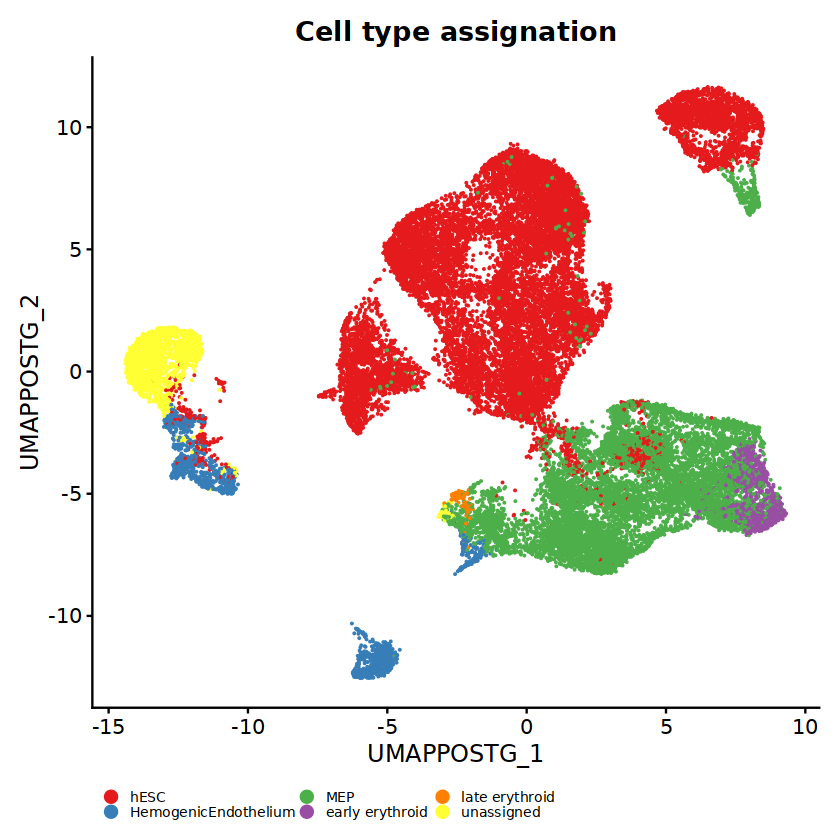

In [118]:
p3 <- DimPlot(adata, reduction = "UMAP_POST_G", group.by = "Integrated_annotation_after_rpca", 
              label = FALSE, cols=vector_colors) 

p3<-p3+
    ggtitle("Cell type assignation")+
    theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))

p3

#LabelClusters(p3, id = "Integrated_annotation_after_rpca",  fontface = "bold", color = "black")+

In [119]:
setwd(path_graphs)
png(file='UMAP_POST_G_Integrated_annotation_after_rpca.png', width=750, height=750)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

## Cell type distribution in cluster

### Integrated_annotation_after_rpca Integrated_annotation_after_rpca time_point vs Diff

In [120]:
met<-adata[[]]

In [121]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"               
[24] "integrated_nn_res.0.5"               
[25] "Subclusters_2"                       
[26] "Subclusters_5"                       
[27] "Subclusters_7"                       
[28] "Subclusters_9"                       
[29] "Subclusters_10"                      
[30] "Subclusters_11"                      
[31] "Subclusters_13"                      
[32] "my_own_clusters"                     
[33] "Integrated_annotation_after_rpca"    
[34] "Assignation_demux_NO_CellBender"     
[35] "Assigned_GFPbc_demux__NO_CellBender" 
[36] "Assignation_demux_CellBender"        
[37] "Assigned_GFPbc_demux_CellBender"     
[38] "Assignation_GEX_not_amplified"       
[39] "time_point"                          
[40] "integrative_genotyping"              
[41] "clone_line"                          
[42] "Genotype"                            
[43] "SCT_SNN_res.0.5"

In [122]:
met.dt<-data.table(met,key=c("time_point","clone_line","Integrated_annotation_after_rpca","Diff"))

In [123]:
#str(met.dt)

In [124]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.table)

'data.frame':	86 obs. of  5 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 1 2 2 3 3 4 4 5 6 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 3 1 3 1 3 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq                            : int  552 3 1769 1 993 1 1354 1 262 2282 ...


In [125]:
met.dt<-data.table(met, key=c("time_point","Integrated_annotation_after_rpca","Diff"))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)

str(Freq.TOTAL)

'data.frame':	8 obs. of  4 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 2 2 2 2 2 2
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 3 1 2 3 4 5 6
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1
 $ TOTAL                           : int  14858 10 1495 1614 9849 1038 122 1770


In [126]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("time_point","Integrated_annotation_after_rpca","Diff"))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [127]:
str(Freq.table)

'data.frame':	86 obs. of  7 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 9 2 11 3 6 4 7 5 12 ...
 $ Freq                            : int  552 1765 1769 306 993 2282 1354 1932 262 1811 ...
 $ TOTAL                           : int  14858 14858 14858 14858 14858 14858 14858 14858 14858 14858 ...
 $ Perc                            : num  3.72 11.88 11.91 2.06 6.68 ...


In [128]:
met.dt<-data.table(met, key=c("time_point","Diff"))
Freq.time_point<-as.data.frame(met.dt[,.(ntime=.N),by=key(met.dt)], stringsAsFactors=F)


str(Freq.time_point)

'data.frame':	2 obs. of  3 variables:
 $ time_point: Ord.factor w/ 2 levels "0_days"<"8_days": 1 2
 $ Diff      : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1
 $ ntime     : int  14868 15888


In [129]:
Freq.table<-merge(Freq.table,
                  Freq.time_point,
                  by=c("time_point","Diff"))

str(Freq.table)

'data.frame':	86 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 9 2 11 3 6 4 7 5 12 ...
 $ Freq                            : int  552 1765 1769 306 993 2282 1354 1932 262 1811 ...
 $ TOTAL                           : int  14858 14858 14858 14858 14858 14858 14858 14858 14858 14858 ...
 $ Perc                            : num  3.72 11.88 11.91 2.06 6.68 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [130]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 50),]

str(Freq.table_filtered)

'data.frame':	80 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 9 2 11 3 6 4 7 5 12 ...
 $ Freq                            : int  552 1765 1769 306 993 2282 1354 1932 262 1811 ...
 $ TOTAL                           : int  14858 14858 14858 14858 14858 14858 14858 14858 14858 14858 ...
 $ Perc                            : num  3.72 11.88 11.91 2.06 6.68 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


In [131]:
fill_colours<-c(brewer.pal(9, "Greens")[c(5,6,7)],brewer.pal(9, "Reds")[c(5,6,7)],brewer.pal(9, "Purples")[c(5,6,7)],brewer.pal(9, "PuRd")[c(5,6,7)],'gray','black')

In [132]:
str(Freq.table_filtered)

'data.frame':	80 obs. of  8 variables:
 $ time_point                      : Ord.factor w/ 2 levels "0_days"<"8_days": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff                            : Ord.factor w/ 1 level "Diff_MK_non_competition": 1 1 1 1 1 1 1 1 1 1 ...
 $ Integrated_annotation_after_rpca: Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ clone_line                      : Ord.factor w/ 12 levels "wt_1"<"wt_2"<..: 1 9 2 11 3 6 4 7 5 12 ...
 $ Freq                            : int  552 1765 1769 306 993 2282 1354 1932 262 1811 ...
 $ TOTAL                           : int  14858 14858 14858 14858 14858 14858 14858 14858 14858 14858 ...
 $ Perc                            : num  3.72 11.88 11.91 2.06 6.68 ...
 $ ntime                           : int  14868 14868 14868 14868 14868 14868 14868 14868 14868 14868 ...


-------------------------------------->	0 25 50 75 100


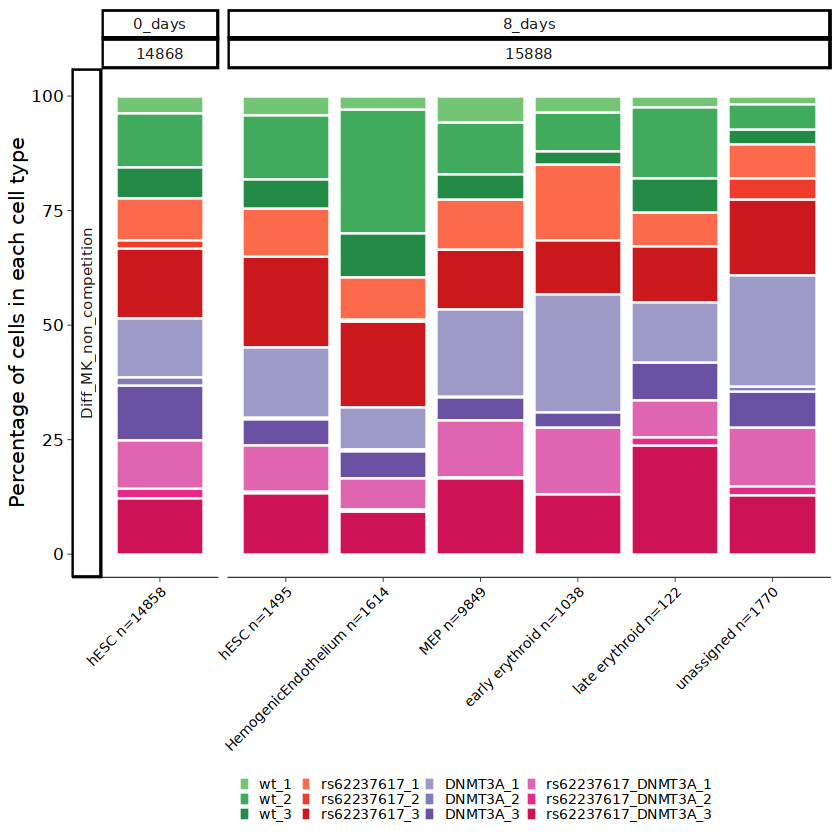

In [133]:
#### Stacked Graph #1---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-Freq.table_filtered %>%
    mutate(myaxis = paste0(Integrated_annotation_after_rpca, " ", "n=", TOTAL), drop=F) %>%
    mutate(myaxis=fct_reorder(myaxis,as.numeric(Integrated_annotation_after_rpca)), drop=F) %>%
    ggplot(aes(x=myaxis, y=Perc, fill=clone_line)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cell type",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=fill_colours,
                      drop=F,
                      name="Integrated_annotation_after_rpca")

 stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(Diff ~ time_point+ntime, scales='free_x', space='free_x', switch="y", 
               labeller=labeller(paste0(Freq.table_filtered$time_point, "\n", "n=", Freq.table_filtered$ntime, drop=T)))+   
    scale_x_discrete(name="Seurat cluster", drop=T)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=6),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,hjust=1,vjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")



stacked_barplot

In [134]:
setwd(path_graphs)

svgname<-paste("POST_G_stacked_barplot_Diff_vs_time_point_Integrated_annotation_after_rpca_vs_clone_line",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="png")
}

Saving 6.67 x 6.67 in image


## Dotplot on markers

In [135]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD3E','CD14','TPSB2','NCAM1','NKG7','PRF1')

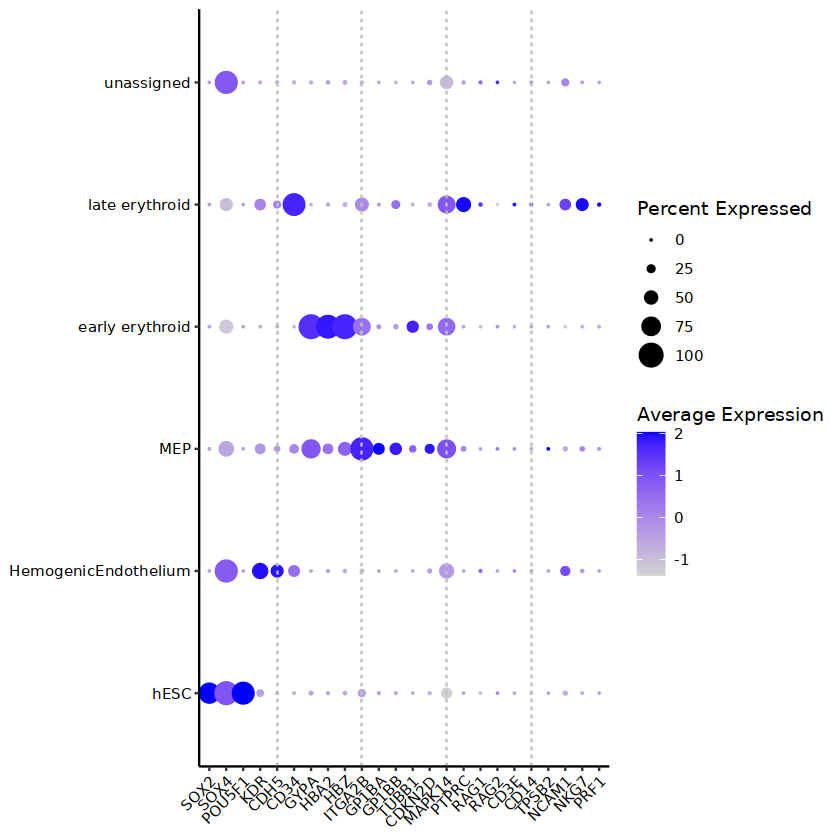

In [136]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Integrated_annotation_after_rpca")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [137]:
setwd(path_graphs)

svgname<-paste("POST_G_Dotplot_Integrated_annotation_after_rpca_MARKERS",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


In [138]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

Warning message:
"Found the following features in more than one assay, excluding the default. We will not include these in the final data frame: TPSAB1, TRDC, GZMB, GZMK, IFNG, FCGR3A, TBX21"
Warning message:
"The following requested variables were not found: TPSAB1, TRDC, GZMB, GZMK, IFNG, FCGR3A, TBX21"


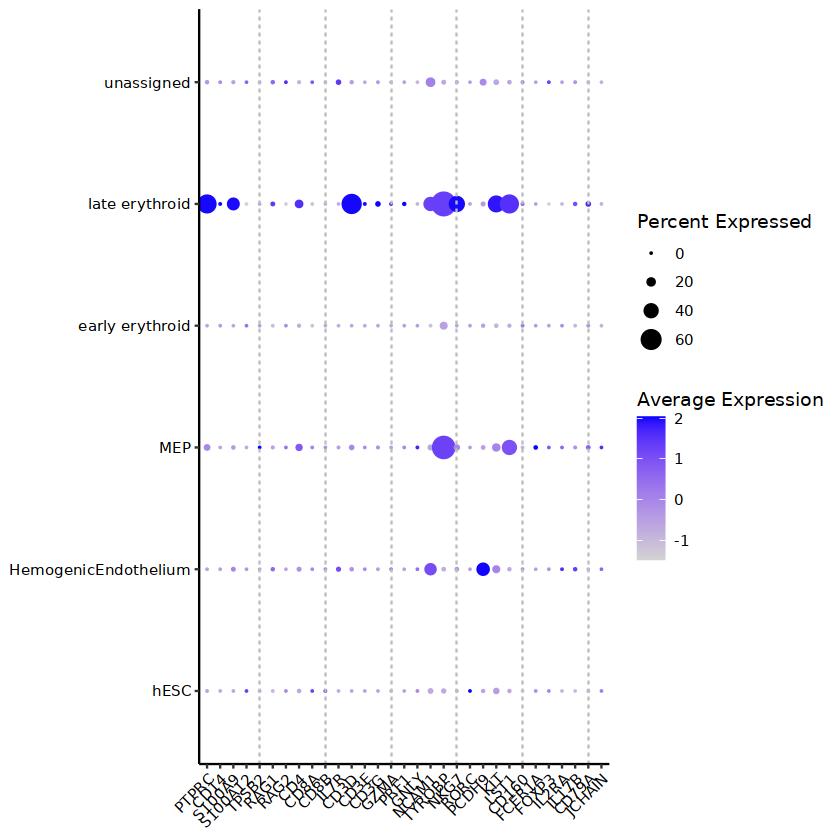

In [139]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="Integrated_annotation_after_rpca")+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3



In [140]:
setwd(path_graphs)

svgname<-paste("POST_G_Dotplot_Integrated_annotation_after_rpca_NEW_MARKERS",".png",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= dotplot3,
         device="png")
}

Saving 6.67 x 6.67 in image


# save intermediate

setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")

saveRDS(adata, file="merged_final_cell_annotation_intermediate.rds")

# Pick up

setwd("/scratch/manuel.tardaguila/hESC_MK_SCRNAseq_10X/no_competition/processing_outputs/")

adata<-readRDS(file="merged_final_cell_annotation_intermediate.rds")


adata


In [141]:
colnames(adata@meta.data)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "nCount_RNA_raw"                      
 [5] "nFeature_RNA_raw"                    
 [6] "percent.mt"                          
 [7] "scDblFinder.class"                   
 [8] "scDblFinder.score"                   
 [9] "scDblFinder.weighted"                
[10] "scDblFinder.cxds_score"              
[11] "Diff"                                
[12] "nCount_SCT"                          
[13] "nFeature_SCT"                        
[14] "SCT_snn_res.2"                       
[15] "seurat_clusters"                     
[16] "SCT_snn_res.0.5"                     
[17] "CellTypist_label_Alsinet"            
[18] "CellTypist_conf_score_Alsinet"       
[19] "CellTypist_label_FBMA"               
[20] "CellTypist_conf_score_FBMA"          
[21] "CellTypist_label_Immune_ALL_low"     
[22] "CellTypist_conf_score_Immune_ALL_low"
[23] "Integrated_annotation"               
[24] "integrated_nn_res.0.5"               
[25] "Subclusters_2"                       
[26] "Subclusters_5"                       
[27] "Subclusters_7"                       
[28] "Subclusters_9"                       
[29] "Subclusters_10"                      
[30] "Subclusters_11"                      
[31] "Subclusters_13"                      
[32] "my_own_clusters"                     
[33] "Integrated_annotation_after_rpca"    
[34] "Assignation_demux_NO_CellBender"     
[35] "Assigned_GFPbc_demux__NO_CellBender" 
[36] "Assignation_demux_CellBender"        
[37] "Assigned_GFPbc_demux_CellBender"     
[38] "Assignation_GEX_not_amplified"       
[39] "time_point"                          
[40] "integrative_genotyping"              
[41] "clone_line"                          
[42] "Genotype"                            
[43] "SCT_SNN_res.0.5"

In [142]:
levels_ordered_cells<-levels(adata@meta.data$Integrated_annotation_after_rpca)

str(levels_ordered_cells)
str(adata@meta.data$Integrated_annotation_after_rpca)

 chr [1:6] "hESC" "HemogenicEndothelium" "MEP" "early erythroid" ...
 Ord.factor w/ 6 levels "hESC"<"HemogenicEndothelium"<..: 1 1 1 1 1 1 1 1 1 1 ...


In [143]:
adata@meta.data$Integrated_annotation_after_rpca<-as.character(adata@meta.data$Integrated_annotation_after_rpca)

str(adata@meta.data$Integrated_annotation_after_rpca)

 chr [1:30756] "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" "hESC" ...


# SAVE FINAL

In [149]:
setwd("/group/soranzo/manuel.tardaguila/2025_hESC_MK_SCRNAseq_10X/no_competition/")

In [ ]:
saveRDS(adata, file="merged_final_cell_annotation.rds")